In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import pandas_profiling
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 30) 
pd.set_option('display.max_columns', 30)

stud = pd.read_csv('stud_math.csv')

In [82]:
#знакомимся с нашим набором данных

display(stud.head(10))
stud.info() 

school sex  age address famsize Pstatus  Medu  Fedu      Mjob     Fjob  \
0     GP   F   18       U     NaN       A   4.0   4.0   at_home  teacher   
1     GP   F   17       U     GT3     NaN   1.0   1.0   at_home    other   
2     GP   F   15       U     LE3       T   1.0   1.0   at_home    other   
3     GP   F   15       U     GT3       T   4.0   2.0    health      NaN   
4     GP   F   16       U     GT3       T   3.0   3.0     other    other   
5     GP   M   16       U     LE3       T   4.0   3.0  services    other   
6     GP   M   16     NaN     LE3       T   2.0   2.0     other    other   
7     GP   F   17       U     GT3       A   4.0   4.0     other  teacher   
8     GP   M   15       U     LE3       A   3.0   2.0  services    other   
9     GP   M   15       U     NaN     NaN   3.0   4.0     other    other   

       reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0      course   mother         2.0        2.0       0.0       yes     no   no   
1      course   father         1.0        2.0       0.0        no    yes   no   
2       other   mother         1.0        2.0       3.0       yes     no  NaN   
3        home   mother         1.0        3.0       0.0        no    yes  yes   
4        home   father         1.0        2.0       0.0        no    yes  yes   
5  reputation   mother         1.0        2.0       0.0        no    yes  yes   
6        home   mother         1.0        2.0       0.0        no     no   no   
7        home   mother         2.0        2.0       0.0       yes    yes   no   
8        home   mother         1.0        2.0       0.0        no    yes  yes   
9        home   mother         1.0        2.0       0.0        no    yes  yes   

  activities nursery  studytime, granular higher internet romantic  famrel  \
0         no     yes                 -6.0    yes      NaN       no     4.0   
1         no      no                 -6.0    yes      yes       no     5.0   
2         no     yes                 -6.0    yes      yes      NaN     4.0   
3        yes     yes                 -9.0    yes      yes      yes     3.0   
4         no     yes                 -6.0    yes       no       no     4.0   
5        yes     yes                 -6.0    yes      yes       no     5.0   
6         no     yes                 -6.0    yes      yes       no     4.0   
7         no     yes                 -6.0    yes       no       no     4.0   
8         no     yes                 -6.0    yes      yes       no     NaN   
9        yes     yes                 -6.0    yes      yes       no     5.0   

   freetime  goout  health  absences  score  
0       3.0    4.0     3.0       6.0   30.0  
1       3.0    3.0     3.0       4.0   30.0  
2       3.0    2.0     3.0      10.0   50.0  
3       2.0    2.0     5.0       2.0   75.0  
4       3.0    2.0     5.0       4.0   50.0  
5       4.0    2.0     5.0      10.0   75.0  
6       4.0    4.0     3.0       0.0   55.0  
7       1.0    4.0     1.0       6.0   30.0  
8       2.0    2.0     1.0       0.0   95.0  
9       5.0    1.0     5.0       0.0   75.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Видим, что датафрейм состоит из 395 строк и 30 столбцов, 13 из которых числовые, остальные отнесены к типу данных object. Целевая переменная: score, с числовым типом данных, признак успеваемости, который мы будем прогнозировать в дальнешем.

In [83]:
#переименуем некоторые колонки для удобства работы с ними

stud.rename(columns={'studytime, granular': 'granular', 'Pstatus': 'pstatus', 'Medu': 'medu', 'Fedu': 'fedu', 'Mjob': 'mjob', 'Fjob': 'fjob'}, inplace=True)

In [84]:
#Далее можем получить представление о распределении каждого атрибута, просмотрев сводную статистику по числовому признаку:

stud.describe()

age        medu        fedu  traveltime   studytime    failures  \
count  395.000000  392.000000  371.000000  367.000000  388.000000  373.000000   
mean    16.696203    2.750000    2.614555    1.438692    2.038660    0.337802   
std      1.276043    1.098127    2.228732    0.694181    0.842078    0.743135   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000   40.000000    4.000000    4.000000    3.000000   

         granular      famrel    freetime       goout      health    absences  \
count  388.000000  368.000000  384.000000  387.000000  380.000000  383.000000   
mean    -6.115979    3.937500    3.231771    3.105943    3.531579    7.279373   
std      2.526235    0.927277    0.993940    1.115896    1.396019   23.465197   
min    -12.000000   -1.000000    1.000000    1.000000    1.000000    0.000000   
25%     -6.000000    4.000000    3.000000    2.000000    3.000000    0.000000   
50%     -6.000000    4.000000    3.000000    3.000000    4.000000    4.000000   
75%     -3.000000    5.000000    4.000000    4.000000    5.000000    8.000000   
max     -3.000000    5.000000    5.000000    5.000000    5.000000  385.000000   

            score  
count  389.000000  
mean    52.262211  
std     22.919022  
min      0.000000  
25%     40.000000  
50%     55.000000  
75%     70.000000  
max    100.000000

Получаем таблицу подробной информации о распределении для каждого из 13 числовых атрибутов в нашем наборе данных. Мы можем просмотреть эту статистику и начать отмечать некоторые моменты, например, в среднем ученики тратят от 2 до 5 часов на учебу помимо школы в неделю, и как правило дорога до школы у них не занимает много времени, меньше 15 минут. Странными выглядят данные атрибута failure, по этим показателям можно предположить, что у большинства либо никаких неудач не зафиксировано, либо наоборот их слишком много, что также записывается нулем.

In [89]:
#следующим шагом удалим выбросы в колонках с числовыми значениями, а также заменим пропуски:

numbers = ['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'granular', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']

for column in stud.columns:
    if column in numbers:
        q1 = stud[column].quantile(q = 0.25)
        q3 = stud[column].quantile(q = 0.75)
        for value in stud[column]:
            if value - 2*(stud[column].std()) >= q3:
                value = q3
            elif value + 2*(stud[column].std()) <= q1:
                value = q1

In [90]:
#список колонок, где мы меняем пропуски на медиану или моду:
columns2 = ['school', 'sex', 'address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'granular', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences']

In [91]:
#замена пропусков

for column in columns2:
    if column in numbers:
        median_ = stud[column].median()
        stud[column].fillna(value=median_, inplace=True, axis=0)
    else:
      mode_ = stud[column].mode()[0]
    stud[column].fillna(value=mode_, inplace=True, axis=0)

In [92]:
#выводим статистические характеристики данных по нечисловому признаку 
stud.describe(include = ['object'])

school  sex address famsize pstatus   mjob   fjob  reason guardian  \
count     395  395     395     395     395    395    395     395      395   
unique      2    2       2       2       2      5      5       4        3   
top        GP    F       U     GT3       T  other  other  course   mother   
freq      349  208     312     288     359    152    233     154      281   

       schoolsup famsup paid activities nursery higher internet romantic  
count        395    395  395        395     395    395      395      395  
unique         2      2    2          2       2      2        2        2  
top           no    yes   no        yes     yes    yes      yes       no  
freq         344    258  240        209     316    376      339      271

По этой статистике уже можно увидеть, что учеников школы "GP" намного больше, чем других (349 из 395(!)), или в подавляющем большинстве ученики имеют братьев/сестер (чаще всего встречается значение 'больше трёх' в переменной famsize).

In [93]:
#Оценка количества уникальных значений для номинативных переменных
stud.select_dtypes(include='object').nunique()

school        2
sex           2
address       2
famsize       2
pstatus       2
mjob          5
fjob          5
reason        4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
dtype: int64

Видим, что количество уникальных значений в основном не превышает 2-х (где был выбор между yes/no), а там где превышает использованы все варианты (максимальное кол-во уникальных значений).  

In [94]:
#Выводим матрицу корреляций числовых признаков
stud.corr()

age      medu      fedu  traveltime  studytime  failures  \
age         1.000000 -0.161375 -0.132064    0.084755  -0.015355  0.228081   
medu       -0.161375  1.000000  0.262065   -0.160877   0.077050 -0.245110   
fedu       -0.132064  0.262065  1.000000    0.039862   0.052459 -0.146472   
traveltime  0.084755 -0.160877  0.039862    1.000000  -0.094637  0.049670   
studytime  -0.015355  0.077050  0.052459   -0.094637   1.000000 -0.166598   
failures    0.228081 -0.245110 -0.146472    0.049670  -0.166598  1.000000   
granular    0.015355 -0.077050 -0.052459    0.094637  -1.000000  0.166598   
famrel      0.066693 -0.009605  0.039657   -0.015151   0.043739 -0.029921   
freetime    0.026443  0.026210 -0.067393   -0.012496  -0.119014  0.094826   
goout       0.134069  0.063361 -0.022996    0.051775  -0.051090  0.113649   
health     -0.063892 -0.050991  0.016871   -0.044842  -0.073674  0.075849   
absences    0.091531 -0.010979  0.004668   -0.038511  -0.025619  0.055245   
score      -0.155726  0.209758  0.075273   -0.056535   0.114295 -0.337187   

            granular    famrel  freetime     goout    health  absences  \
age         0.015355  0.066693  0.026443  0.134069 -0.063892  0.091531   
medu       -0.077050 -0.009605  0.026210  0.063361 -0.050991 -0.010979   
fedu       -0.052459  0.039657 -0.067393 -0.022996  0.016871  0.004668   
traveltime  0.094637 -0.015151 -0.012496  0.051775 -0.044842 -0.038511   
studytime  -1.000000  0.043739 -0.119014 -0.051090 -0.073674 -0.025619   
failures    0.166598 -0.029921  0.094826  0.113649  0.075849  0.055245   
granular    1.000000 -0.043739  0.119014  0.051090  0.073674  0.025619   
famrel     -0.043739  1.000000  0.168225  0.078006  0.077776 -0.079609   
freetime    0.119014  0.168225  1.000000  0.292305  0.060557  0.006943   
goout       0.051090  0.078006  0.292305  1.000000 -0.014274 -0.049745   
health      0.073674  0.077776  0.060557 -0.014274  1.000000 -0.017368   
absences    0.025619 -0.079609  0.006943 -0.049745 -0.017368  1.000000   
score      -0.114295  0.054624  0.017481 -0.127742 -0.073208  0.062642   

               score  
age        -0.155726  
medu        0.209758  
fedu        0.075273  
traveltime -0.056535  
studytime   0.114295  
failures   -0.337187  
granular   -0.114295  
famrel      0.054624  
freetime    0.017481  
goout      -0.127742  
health     -0.073208  
absences    0.062642  
score       1.000000

In [95]:
pandas_profiling.ProfileReport(stud)

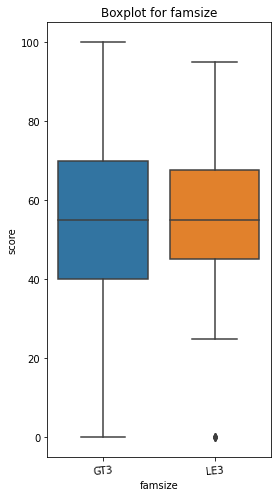

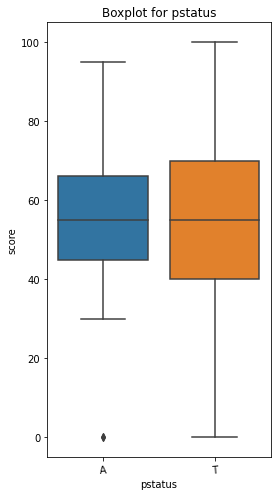

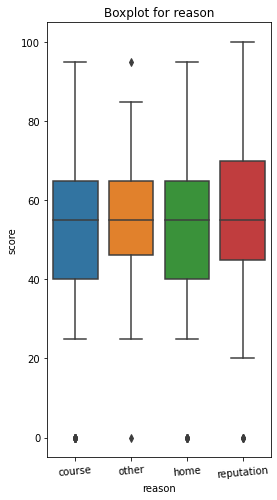

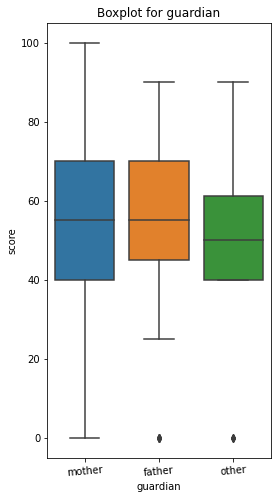

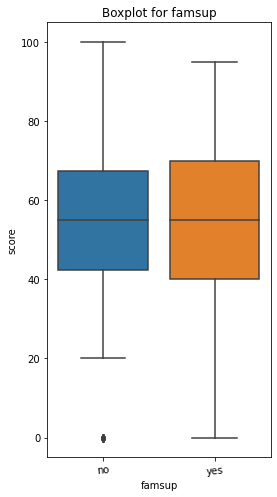

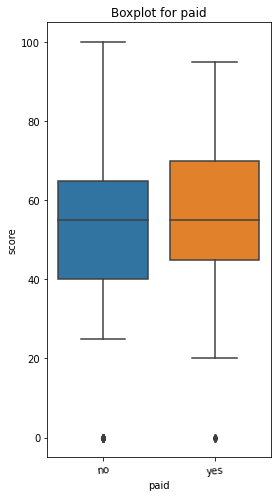

In [96]:
#признаки, которые не могут влиять на итоговую оценку
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (4, 8))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:5])],
               ax=ax)
    plt.xticks(rotation=5)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
for col in ['famsize', 'pstatus', 'reason', 'guardian', 'famsup', 'paid']:
    get_boxplot(col)

In [97]:
#выборочный срез:

stud.sample(5)

school sex  age address famsize pstatus  medu  fedu      mjob      fjob  \
0       GP   F   18       U     GT3       A   4.0   4.0   at_home   teacher   
85      GP   F   15       U     GT3       T   4.0   4.0  services  services   
346     GP   M   18       R     GT3       T   4.0   3.0   teacher  services   
221     GP   F   17       U     GT3       T   1.0   1.0   at_home     other   
387     MS   F   19       R     GT3       T   2.0   3.0  services     other   

         reason guardian  traveltime  studytime  failures schoolsup famsup  \
0        course   mother         2.0        2.0       0.0       yes     no   
85   reputation   father         2.0        2.0       2.0        no     no   
346      course   mother         1.0        3.0       0.0        no     no   
221  reputation   mother         1.0        3.0       1.0        no    yes   
387      course   mother         1.0        3.0       1.0        no     no   

    paid activities nursery  granular higher internet romantic  famrel  \
0     no         no     yes      -6.0    yes      yes       no     4.0   
85   yes         no     yes      -6.0    yes      yes      yes     4.0   
346   no         no     yes      -9.0    yes      yes      yes     5.0   
221   no        yes     yes      -9.0    yes       no      yes     4.0   
387   no        yes      no      -9.0    yes      yes       no     5.0   

     freetime  goout  health  absences  score  
0         3.0    4.0     3.0       6.0   30.0  
85        4.0    4.0     5.0       6.0   40.0  
346       3.0    2.0     4.0       9.0   80.0  
221       3.0    3.0     5.0       0.0    0.0  
387       4.0    2.0     5.0       0.0    0.0

Итак были получены следующие выводы:

- В данных достаточно мало пустых значений, самый большой показатель наблюдался у Pstatus

- Выявлена довольно незначительная положительная корреляция параметров score с Medu, Fedu и studytime, что может говорить о том, что чем выше образование родителей, тем выше вероятность получения хорошей оценки, либо оценки выставляются с учетом образования родителей или предвзято

- Самый большой показатель корреляции у параметра score выявлен в атрибуте failure, однако связь у них обратная, т.е. на итоговую успеваемость сильнее всего могут повлиять внеучебные неудачи/плохая итоговая оценка может способствовать увеличению количества неудач во внешкольной жизни

- Параметры Studytime и Studytime, granular демонстрируют максимально возможную отрицательную взаимосвязь;

- Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это abscence, Medu, Fedu, famrel и Studytime.

Дополнительный комментарий для ментора: 
Уважаемый ментор! Данная работа мной, типичным гуманитарием, была выполнена не настолько правильно и полно, насколько бы мне этого хотелось, я не успел посмотреть вводный вебинар, понял что к следующему проекту я его буду обязательно смотреть, но пока есть, что есть.. не ругайтесь на меня матом, пожалуйста..